# Test `doc-ufcn` software on sample images.

We run two models from [Teklia](https://teklia.com/) for their [`doc-ufcn`](https://pypi.org/project/doc-ufcn/) model.
- [`generic-historical-line`](https://huggingface.co/Teklia/doc-ufcn-generic-historical-line): detects lines in historical documents.
- [`generic-page`](https://huggingface.co/Teklia/doc-ufcn-generic-page): detects pages in historical documents.

In [1]:
import logging
import sys

logging.basicConfig(format="[%(levelname)s] %(message)s", stream=sys.stdout, level=logging.INFO)

In [2]:
from typing import Tuple

import cv2
from doc_ufcn import models
from doc_ufcn.main import DocUFCN
from matplotlib import pyplot


def load_model_from_hugging_face_name(hugging_face_doc_ufcn_model_name: str) -> "DocUFCN":
    model_path, parameters = models.download_model(hugging_face_doc_ufcn_model_name)
    model = DocUFCN(len(parameters["classes"]), parameters["input_size"], "cpu")
    model.load(model_path, parameters["mean"], parameters["std"])
    return model


def model_predict(model: "DocUFCN", image: "cv2.cvtColor") -> Tuple:
    detected_polygons, probabilities, mask, overlap = model.predict(
        image, raw_output=True, mask_output=True, overlap_output=True
    )
    return detected_polygons, probabilities, mask, overlap


def load_image(image_path: str) -> "cv2.cvtColor":
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)


def show_image(image: "cv2.cvtColor"):
    pyplot.imshow(image, interpolation="nearest")
    pyplot.show()
    pyplot.close()

# Import test image

In [3]:
image_1_path = "./test_images/Echevronne_1633__registre0004.jpg"
image_2_path = "./test_images/Vic_sur_seille_1712__vic_sur_seille_1710_1739_0032.jpg"

In [4]:
image_1 = load_image(image_1_path)
image_2 = load_image(image_2_path)

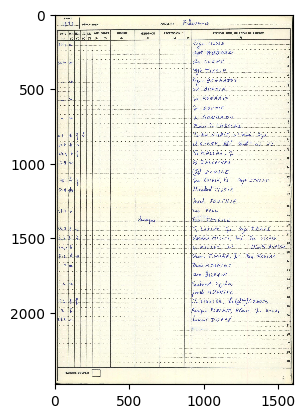

In [5]:
show_image(image_1)

In [6]:
model = load_model_from_hugging_face_name("generic-page")
detected_polygons, probabilities, mask, overlap = model_predict(model, image_1)

[INFO] Will look for model @ Teklia/doc-ufcn-generic-page


Downloading:   0%|          | 0.00/145 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.2M [00:00<?, ?B/s]

[INFO] Image processed


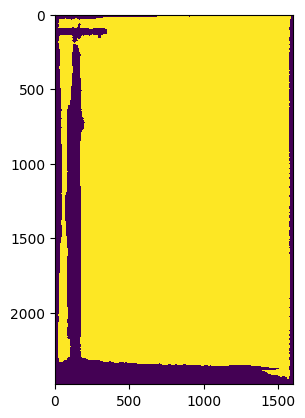

In [7]:
show_image(mask)

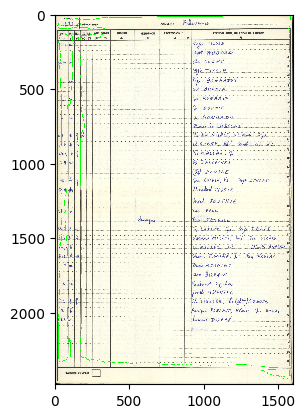

In [8]:
show_image(overlap)

In [9]:
model = load_model_from_hugging_face_name("generic-historical-line")
detected_polygons, probabilities, mask, overlap = model_predict(model, image_1)

[INFO] Will look for model @ Teklia/doc-ufcn-generic-historical-line
[INFO] Image processed


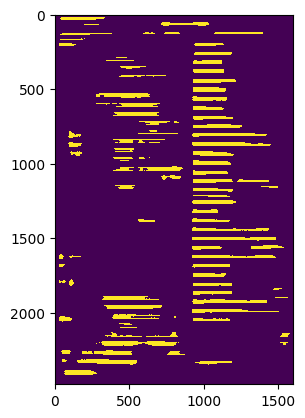

In [10]:
show_image(mask)

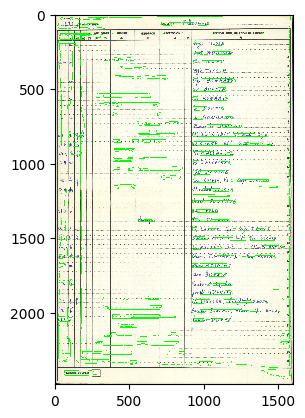

In [11]:
show_image(overlap)